# Bonus - Import to Pandas and Graph

In [1]:
# Import dependencies
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

from config import login

In [2]:
# Connect to DB
db_url = 'postgresql://' + login + '@localhost:5432/employees_db'
engine = create_engine(db_url)
connection = engine.connect()

## Create a histogram to visualize the most common salary ranges for employees.

In [3]:
# Get salary data from DB
salary_data = pd.read_sql("SELECT salary FROM salaries", connection)
salary_data.head()

,salary
0,60117
1,65828
2,40006
3,40054
4,78228


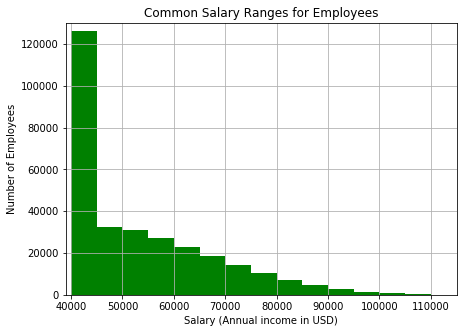

In [4]:
#Create a histogram to visualize the most common salary ranges for employees.
bins = [0,40000,45000,50000,55000,60000,65000,70000,75000,80000,85000,90000,95000,100000,105000,110000,115000,120000]

histogram = salary_data.hist(bins=bins, figsize=(7,5), color="g")

# Label graph
plt.xlabel("Salary (Annual income in USD)")
plt.ylabel("Number of Employees")
plt.title("Common Salary Ranges for Employees")

# Set limits
plt.xlim(39000, 115000)
plt.ylim(0, 130000)

# Display plot
plt.savefig("images/salary_histogram.png")
plt.show()

## Create a bar chart of average salary by title.

In [5]:
# write query
sql_query = 'SELECT t.title, round(avg(s.salary)) AS "Average Salary"\
FROM salaries s \
LEFT JOIN employees e \
ON e.emp_no = s.emp_no \
LEFT JOIN titles t \
ON e.emp_title_id = t.title_id \
GROUP BY t.title;'

# Get data from DB
salary_by_title_data = pd.read_sql(sql_query, connection)
salary_by_title_data.head()

,title,Average Salary
0,Assistant Engineer,48564.0
1,Engineer,48535.0
2,Manager,51531.0
3,Senior Engineer,48507.0
4,Senior Staff,58550.0


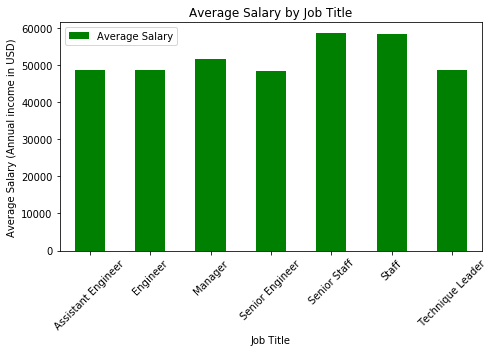

In [6]:
#Create a bar chart of average salary by title.

bar_chart = salary_by_title_data.plot(x="title", y="Average Salary", kind="bar", rot=45, figsize=(7,5), color="g", title="Average Salary by Job Title")

# Label graph
bar_chart.set_xlabel("Job Title")
bar_chart.set_ylabel("Average Salary (Annual income in USD)")

# Display plot
plt.tight_layout()
plt.savefig("images/salary_by_title.png")
